In [11]:
from IPython.display import SVG
import numpy as np

from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.clustering import Louvain, modularity, bimodularity
from sknetwork.linalg import normalize
from sknetwork.utils import bipartite2undirected, membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

from sknetwork.utils import edgelist2adjacency, edgelist2biadjacency
from sknetwork.data import convert_edge_list, load_edge_list, load_graphml
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

In [2]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position


In [3]:
louvain = Louvain()
labels = louvain.fit_transform(adjacency)

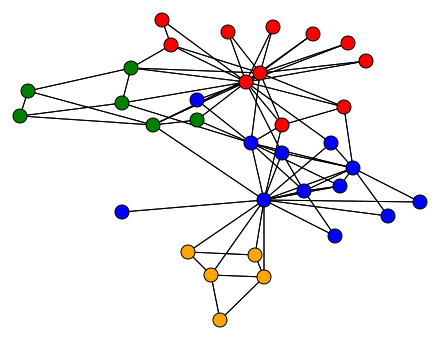

In [4]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [6]:
import pandas as pd
df = pd.read_pickle("data/countries_edges/df_edge_CA_full_data_filtered")
df


,edge,total_edge,c1,c2,latitude_c1,longitude_c1,latitude_c2,longitude_c2
0,"(Germany, Switzerland)",40,Germany,Switzerland,51.165691,10.451526,46.818188,8.227512
1,"(Ethiopia, Singapore)",1,Ethiopia,Singapore,9.145000,40.489673,1.352083,103.819836
2,"(Ethiopia, Switzerland)",11,Ethiopia,Switzerland,9.145000,40.489673,46.818188,8.227512
3,"(Singapore, Switzerland)",1,Singapore,Switzerland,1.352083,103.819836,46.818188,8.227512
4,"(China, United Kingdom)",148,China,United Kingdom,35.861660,104.195397,55.378051,-3.435973
...,...,...,...,...,...,...,...,...
1074,"(Argentina, France)",1,Argentina,France,-38.416097,-63.616672,46.227638,2.213749
1075,"(Denmark, Mexico)",4,Denmark,Mexico,56.263920,9.501785,23.634501,-102.552784
1076,"(Greece, Qatar)",2,Greece,Qatar,39.074208,21.824312,25.354826,51.183884
1077,"(Iran, Serbia)",2,Iran,Serbia,32.427908,53.688046,44.016521,21.005859


In [31]:
edge_list = []

for ind, row in df.iterrows():
    if row.total_edge>10:
        edge_list.append((row.c1, row.c2, row.total_edge))




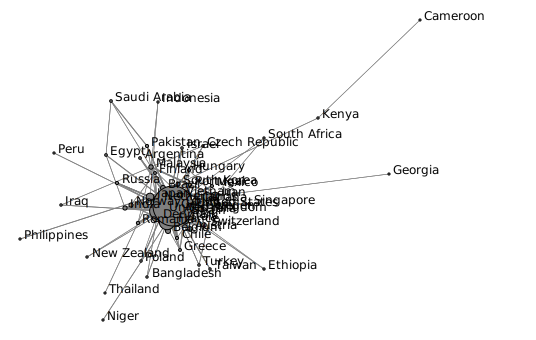

In [32]:
edge_list
graph = convert_edge_list(edge_list)
adjacency = graph.adjacency
names = graph.names
image = svg_graph(adjacency, names=names, display_edge_weight=True, display_node_weight=True)
SVG(image)

In [34]:
df1 = df.copy()
cond = df.total_edge > 10
df1 = df1[cond]
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'c1', 'c2', 'total_edge')

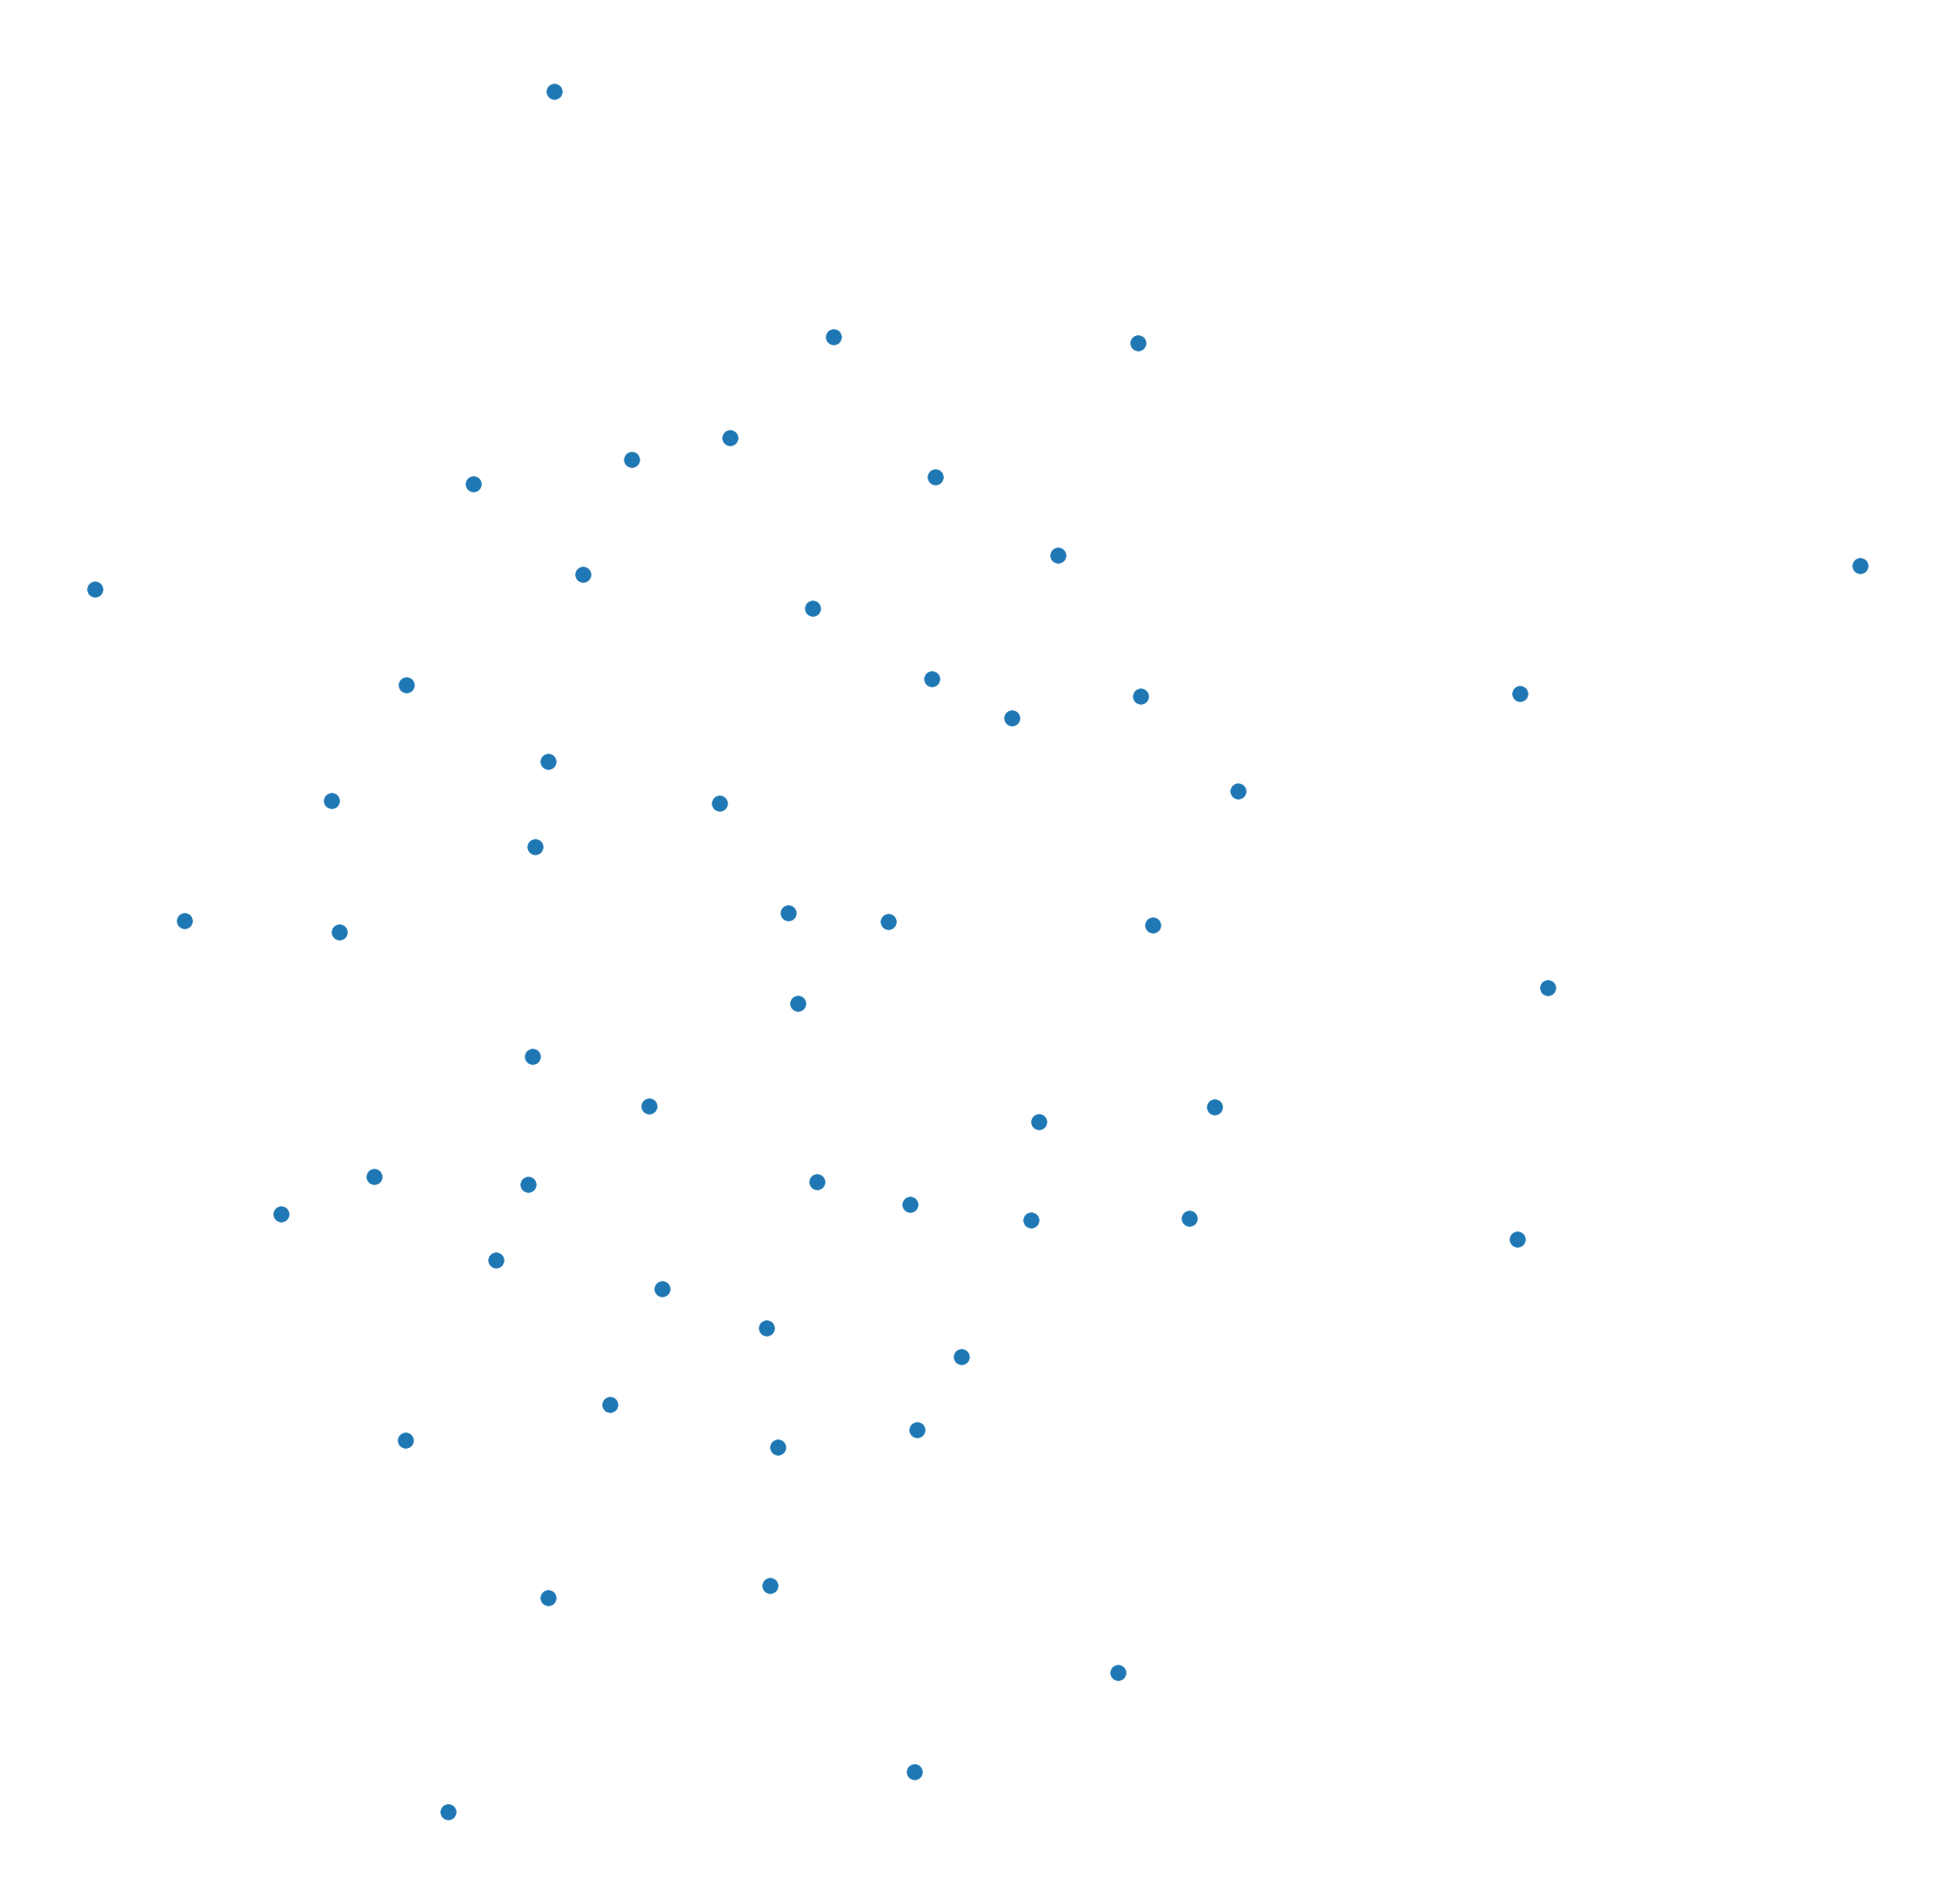

In [44]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

figure(figsize=(40, 40))
# pos = nx.nx_pydot.graphviz_layout(G, prog ='dot')
# pos = nx.spectral_layout(G)
pos = nx.kamada_kawai_layout(G)
plt.axis('off')
# nx.draw_networkx(G, pos=pos, node_size=25, edgecolors='black', edge_color='b')
nodes = nx.draw_networkx_nodes(G, pos=pos)
plt.show()